In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

## Exercise 3b

In [3]:
n_list = [10, 100, 1_000]

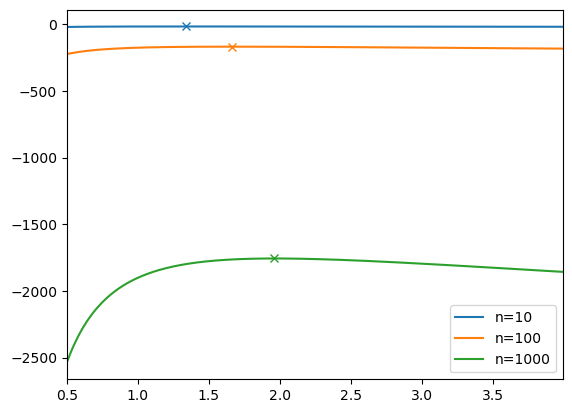

In [4]:
theta_star = 2  # ground-truth variance
sigma_star = np.sqrt(theta_star)  # standard deviation

theta = np.arange(0.5, 4, 0.01)  # range of thetas from 1 to 4

plt.figure()
for idx_n, n in enumerate(n_list):

    x = sigma_star * np.random.randn(n)

    log_likelihood = np.sum( -(x**2)[None, :]/(2*theta[:, None]) - np.log(2*np.pi*theta[:, None])/2, axis=1)
    

    plt.plot(theta, log_likelihood, color=f'C{idx_n}', label=f'n={n}')
    i_max = np.argmax(log_likelihood)
    plt.plot(theta[i_max], log_likelihood[i_max], 'x', color=f'C{idx_n}')
    plt.legend()

plt.xlim([min(theta), max(theta)])
plt.savefig('results/ex3b.pdf', bbox_inches='tight', pad_inches=0)
plt.draw()

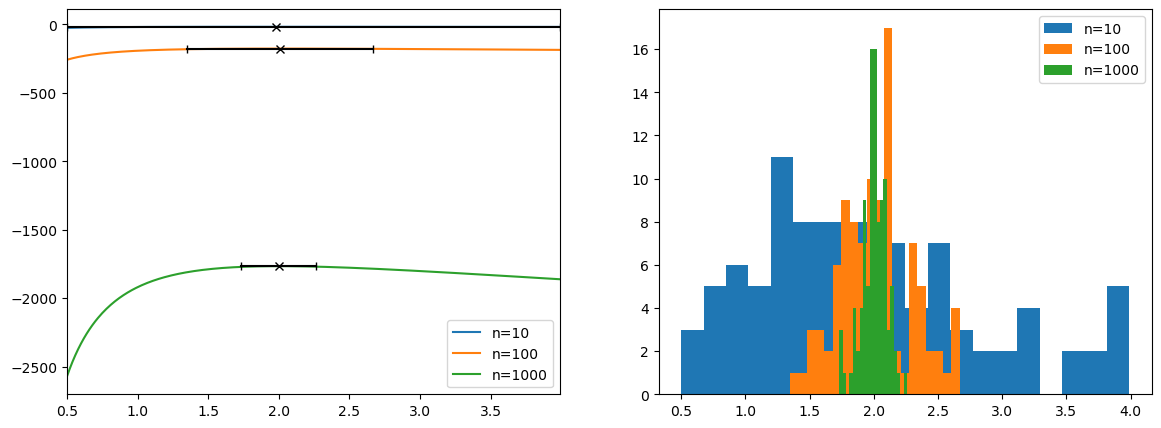

In [5]:
theta_star = 2  # ground-truth variance
sigma_star = np.sqrt(theta_star)  # standard deviation

theta = np.arange(0.5, 4, 0.01)  # range of thetas from 1 to 4

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
for idx_n, n in enumerate(n_list):

    log_likelihoods = np.zeros((100, len(theta)))

    for it in range(100):

        x = sigma_star * np.random.randn(n)

        log_likelihoods[it] = np.sum( -(x**2)[None, :]/(2*theta[:, None]) - np.log(2*np.pi*theta[:, None])/2, axis=1)
    
    log_likelihood = np.mean(log_likelihoods, axis=0)  # average log-likelihood

    ax[0].plot(theta, log_likelihood, color=f'C{idx_n}', label=f'n={n}')

    i_max = np.argmax(log_likelihood)
    ax[0].plot(theta[i_max], log_likelihood[i_max], 'x', color='black')

    # plot minimum and maximum argmax over the 100 iters (horizontal bar)
    i_maxima = np.argmax(log_likelihoods, axis=1)
    ax[0].plot([theta[i_maxima.min()], theta[i_maxima.max()]], [log_likelihood[i_max], log_likelihood[i_max]], '|-', color='black')

    ax[1].hist(theta[i_maxima], color=f'C{idx_n}', bins=20, label=f'n={n}')

ax[0].set_xlim([min(theta), max(theta)])
ax[0].legend()
ax[1].legend()
plt.savefig('results/ex3d.pdf', bbox_inches='tight', pad_inches=0)
plt.draw()